## How Well do Data Analyst jobs pay? How much does having each skill net you?

### Methodology


#### 1. Evaluate median salary for top 6 data jobs in Canada.
#### 2. Find the median salary for each skill, just for Data Analyst jobs.
#### 3. Make appealing visualizations for the skills that are the highest paying, and the most in demand skills.


In [1]:
# Importing necessary libraries, just as before
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from datasets import load_dataset

In [2]:
#loading in the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
#I only want to see Canadian jobs, so I'll filter for them
df_CA = df[(df['job_country'] == 'Canada')].copy()

In [11]:
job_titles = df_CA['job_title_short'].value_counts().index[:8].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Software Engineer',
 'Business Analyst',
 'Senior Data Scientist',
 'Machine Learning Engineer']

In [17]:
df_CA_top8 = df_CA[df_CA['job_title_short'].isin(job_titles)]

In [23]:
#This line is here to get a list of the top jobs for future use
job_order = df_CA_top8.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Machine Learning Engineer', 'Senior Data Scientist',
       'Software Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Data Analyst', 'Business Analyst'],
      dtype='object', name='job_title_short')

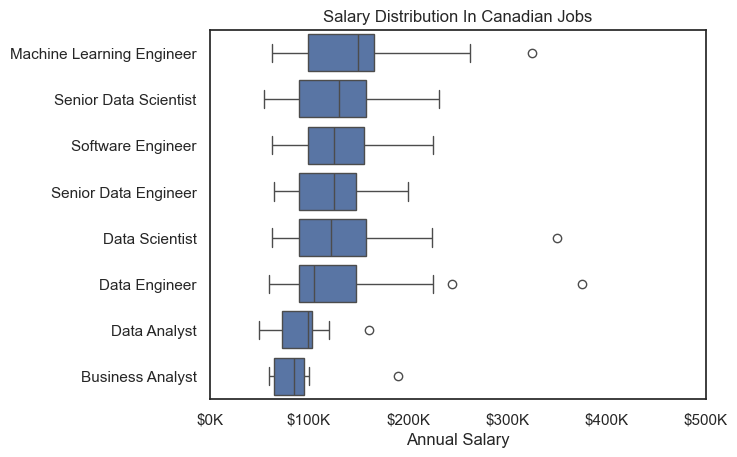

In [63]:
#Lets graph this data with Seaborn
sns.boxplot(data=df_CA_top8, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='white')
plt.title('Salary Distribution In Canadian Jobs')
plt.xlabel('Annual Salary')
plt.ylabel('')
plt.xlim(0,500000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Now Lets Look at the Median Salary Compared to Various Skills for Data Analysts

In [ ]:
#I only want to see Canadian jobs for Data Analyst roles, so I'll filter for them
df_DA_CA = df[
    df['job_title'].str.contains('Data Analyst', case=False, na=False) & (df['job_country'] == 'Canada')].copy()
#Let us again remove NA values
df_DA_CA = df_DA_CA.dropna(subset=['job_skills'])

#Let us again remove NA values
df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

#This line to see what we are working with
df_DA_CA['job_skills'].head()


619116    [python, sql, sheets, looker, tableau, visio, ...
Name: job_skills, dtype: object

## Now, lets have a look at the jobs inside the United States, which I would also be interested in

In [66]:
##I only want to see US jobs now for Data Analyst roles, so I'll filter for them
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Let us again remove NA values
df_DA_US = df_DA_US.dropna(subset=['job_skills'])

#Let us again remove NA values
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

#This line to see what we are working with
df_DA_US['job_skills'].head()


1681                      [sql, tableau, power bi, excel]
3237    [sql, visio, outlook, word, excel, powerpoint,...
3807                        [sql, sql server, ssrs, ssis]
5182                                   [sql, azure, jira]
5839                             [python, excel, tableau]
Name: job_skills, dtype: object

In [67]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [75]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay.head(50)

,count,median
job_skills,,
golang,1,145000.0
elasticsearch,3,128500.0
redis,1,128500.0
dynamodb,1,115000.0
jupyter,5,115000.0
mongodb,14,115000.0
bitbucket,1,111175.0
ssis,23,110000.0
gcp,12,106250.0


In [77]:
df_DA_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_top_skills = df_DA_top_skills.head(10)

df_DA_top_skills

,count,median
job_skills,,
sql,714,87500.0
excel,472,77500.0
python,408,90000.0
tableau,398,90000.0
power bi,279,87500.0
r,244,90000.0
sas,200,84078.5
powerpoint,102,77500.0
word,89,75000.0


### Now this is enough data to graph. Let us visualize this information to make it more clear

In [84]:
df_DA_top_skills = df_DA_top_skills.sort_values('median',ascending=False)

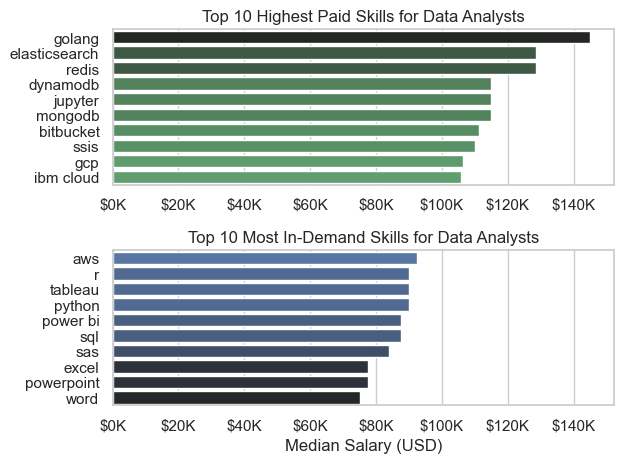

In [86]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='whitegrid')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:g_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, hue='median', ax=ax[1], palette='dark:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
#to make sure the graphs are equal sizes in the x dimention
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()
